In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [94]:
# distance, consume, temp_insideの小数点識別記号が異なるため変更
df_mm = pd.read_csv('measurements.csv', decimal=',')

display(df_mm.head())
df_mm.info()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [95]:
# 欠損値が含まれている範囲と量を確認
print('----------- 欠損値の有無を確認 -----------')
print(df_mm.isnull().any())
print('-' * 42)
print('--------- 欠損値の個数をカウント ---------')
print(df_mm.isnull().sum())
print('-' * 42)

----------- 欠損値の有無を確認 -----------
distance         False
consume          False
speed            False
temp_inside       True
temp_outside     False
specials          True
gas_type         False
AC               False
rain             False
sun              False
refill liters     True
refill gas        True
dtype: bool
------------------------------------------
--------- 欠損値の個数をカウント ---------
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64
------------------------------------------


In [96]:
print('-------- unique値の出現頻度を確認 --------')
print(df_mm['gas_type'].value_counts())
print('-' * 44)

-------- unique値の出現頻度を確認 --------
SP98    228
E10     160
Name: gas_type, dtype: int64
--------------------------------------------


In [97]:
# gas_typeでの違いを数値的に考慮するため、ダミー値に置換
df_mm['gas_type'] = df_mm['gas_type'].replace({'E10': 1, 'SP98': 0})
print(df_mm.head())

   distance  consume  speed  temp_inside  temp_outside specials  gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN         1   0   
1      12.0      4.2     30         21.5            13      NaN         1   0   
2      11.2      5.5     38         21.5            15      NaN         1   0   
3      12.9      3.9     36         21.5            14      NaN         1   0   
4      18.5      4.5     46         21.5            15      NaN         1   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


In [98]:
# temp_insideに欠損値が存在するので、平均値で補てん
print('-------- unique値の出現頻度を確認 --------')
print(df_mm['temp_inside'].value_counts())
print('-' * 44)

temp_inside_mean = df_mm['temp_inside'].mean()
print('平均値 = {:.3f}'.format(temp_inside_mean))

df_mm['temp_inside'] = df_mm['temp_inside'].fillna(temp_inside_mean)

-------- unique値の出現頻度を確認 --------
21.5    133
22.0    102
22.5     59
20.0     25
23.0     13
21.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64
--------------------------------------------
平均値 = 21.930


In [99]:
df_mm.describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.412371,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.492897,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,1.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,45.000000


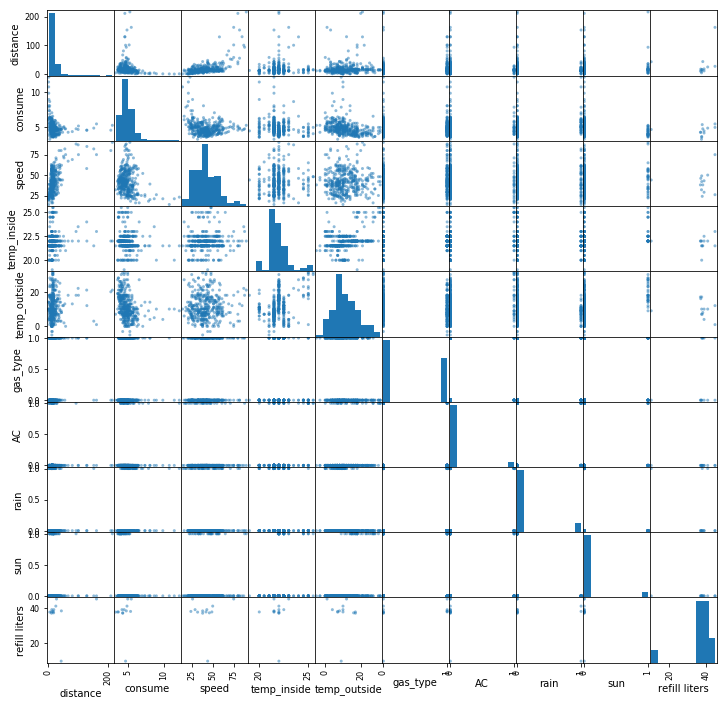

In [101]:
pd.plotting.scatter_matrix(df_mm, figsize=(12,12))
plt.show()

In [102]:
# 相関係数を確認
df_mm.corr()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,0.053411,-0.025738,-0.019791,0.081120,0.132852
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.015327,0.096591,0.248118,-0.170667,0.100868
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,0.097360,-0.035408,0.009489,0.081618,0.049673
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,-0.010198,0.297376,-0.036937,0.242248,0.034128
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,-0.148705,0.167562,-0.186315,0.346903,-0.084867
gas_type,0.053411,0.015327,0.097360,-0.010198,-0.148705,1.000000,-0.105285,-0.060328,-0.022761,0.238081
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,-0.105285,1.000000,0.242915,0.088598,NaN
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,-0.060328,0.242915,1.000000,-0.112650,-0.494501
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,-0.022761,0.088598,-0.112650,1.000000,NaN
refill liters,0.132852,0.100868,0.049673,0.034128,-0.084867,0.238081,NaN,-0.494501,NaN,1.000000


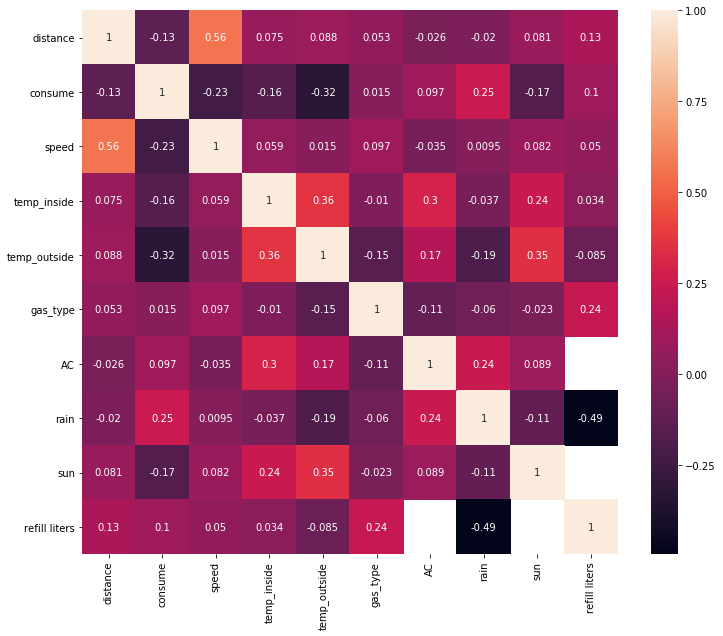

In [104]:
# 相関係数を可視化
plt.figure(figsize=(12,10))
sns.heatmap(df_mm.corr(), annot=True)
plt.show()

In [105]:
# 係数を求める
y = df_mm['consume'].values
X = df_mm[['temp_outside', 'gas_type', 'rain']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

In [106]:
x1 = df_mm['temp_outside'].values
x2 = df_mm['gas_type'].values
x3 = df_mm['rain'].values

y_est = w0 + w1*x1 + w2*x2 + w3*x3
sq_err = 0.5 * np.sum( (y - y_est)**2 )
rsq_err = np.sqrt(sq_err)
abs_err = 0.5 * np.sum(abs(y - y_est))

print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f},'.format(w0, w1, w2, w3))
print('MSE（二乗誤差） = {:.3f}'.format(sq_err))
print('RMSE（平方根二乗誤差） = {:.3f}'.format(rsq_err))
print('MAE（絶対誤差） = {:.3f}'.format(abs_err))

w0 = 5.333, w1 = -0.042, w2 = -0.033, w3 = 0.607,
MSE（二乗誤差） = 177.652
RMSE（平方根二乗誤差） = 13.329
MAE（絶対誤差） = 118.428
